In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
import yfinance as yf

In [3]:
SOL_ticker=yf.Ticker("SOL-USD")

In [4]:
SOL=SOL_ticker.history(period="max")
SOL

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-04-10 00:00:00+00:00,0.832005,1.313487,0.694187,0.951054,87364276,0.0,0.0
2020-04-11 00:00:00+00:00,0.951054,1.049073,0.765020,0.776819,43862444,0.0,0.0
2020-04-12 00:00:00+00:00,0.785448,0.956670,0.762426,0.882507,38736897,0.0,0.0
2020-04-13 00:00:00+00:00,0.890760,0.891603,0.773976,0.777832,18211285,0.0,0.0
2020-04-14 00:00:00+00:00,0.777832,0.796472,0.628169,0.661925,16747614,0.0,0.0
...,...,...,...,...,...,...,...
2024-07-24 00:00:00+00:00,172.758514,182.357605,171.210419,178.032303,3112174836,0.0,0.0
2024-07-25 00:00:00+00:00,178.029526,179.520935,165.932541,171.963074,4067186719,0.0,0.0
2024-07-26 00:00:00+00:00,171.962570,183.538361,171.877899,183.136719,2816314095,0.0,0.0


In [5]:
pip install neuralprophet

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [6]:
from neuralprophet import NeuralProphet

ERROR:NP.plotly:Importing plotly failed. Interactive plots will not work.
ERROR:NP.plotly:Importing plotly failed. Interactive plots will not work.


In [7]:
import pickle

In [8]:
SOL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1571 entries, 2020-04-10 00:00:00+00:00 to 2024-07-29 00:00:00+00:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1571 non-null   float64
 1   High          1571 non-null   float64
 2   Low           1571 non-null   float64
 3   Close         1571 non-null   float64
 4   Volume        1571 non-null   int64  
 5   Dividends     1571 non-null   float64
 6   Stock Splits  1571 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 98.2 KB


In [9]:
SOL_reset = SOL.reset_index()
SOL_reset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1571 entries, 0 to 1570
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   Date          1571 non-null   datetime64[ns, UTC]
 1   Open          1571 non-null   float64            
 2   High          1571 non-null   float64            
 3   Low           1571 non-null   float64            
 4   Close         1571 non-null   float64            
 5   Volume        1571 non-null   int64              
 6   Dividends     1571 non-null   float64            
 7   Stock Splits  1571 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(6), int64(1)
memory usage: 98.3 KB


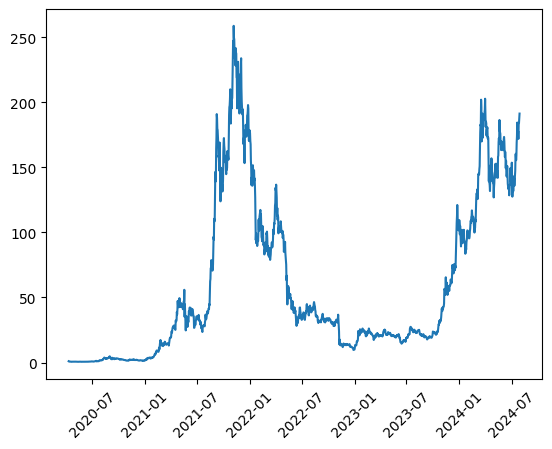

In [20]:
plt.plot(SOL_reset['Date'],SOL_reset['Close'])
plt.xticks(rotation=45)
plt.show()

In [11]:
SOL_reset.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)
SOL_final=SOL_reset[['ds','y']]
SOL_final.head()

,ds,y
0,2020-04-10 00:00:00+00:00,0.951054
1,2020-04-11 00:00:00+00:00,0.776819
2,2020-04-12 00:00:00+00:00,0.882507
3,2020-04-13 00:00:00+00:00,0.777832
4,2020-04-14 00:00:00+00:00,0.661925


In [12]:
SOL_train=SOL_final.iloc[:len(SOL_final)-365]
SOL_test=SOL_final.iloc[len(SOL_final)-365:]
print(SOL_train.shape)
print(SOL_test.shape)

(1206, 2)
(365, 2)


In [13]:
model_np=NeuralProphet(batch_size=8)
model_np.fit(SOL_train,freq='D',epochs=1000)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.917% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.917% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO:NP.utils:Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.


Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (151) is too small than the required number                     for the learning rate finder (227). The results might not be optimal.


Finding best initial lr:   0%|          | 0/227 [00:00<?, ?it/s]

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.10/dist-packages/pytorch_lightning/utilities/data.py:78: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 8. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.


WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.10/dist-packages/pytorch_lightning/utilities/data.py:78: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 6. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.




Training: |          | 0/? [00:00<?, ?it/s]

,train_loss,reg_loss,MAE,RMSE,Loss,RegLoss,epoch
0,1.153692,0.0,295.134277,331.292725,1.152432,0.0,0
1,0.191223,0.0,74.688507,92.182190,0.191106,0.0,1
2,0.107165,0.0,50.140614,63.178234,0.107096,0.0,2
3,0.081040,0.0,40.413219,51.856853,0.081141,0.0,3
4,0.063550,0.0,32.889748,44.711594,0.063588,0.0,4
...,...,...,...,...,...,...,...
995,0.007843,0.0,10.092242,13.079128,0.007843,0.0,995
996,0.007854,0.0,10.006982,13.242839,0.007844,0.0,996
997,0.007920,0.0,10.129472,13.282678,0.007915,0.0,997
998,0.007891,0.0,10.128623,13.286692,0.007884,0.0,998


In [14]:
# future = model_np.make_future_dataframe(btc_final, periods=365)
forecast=model_np.predict(SOL_final)
forecast.head()

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.873% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.873% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.873% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.873% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


,ds,y,yhat1,trend,season_yearly,season_weekly
0,2020-04-10,0.951054,-1.367015,-11.427670,9.761618,0.299039
1,2020-04-11,0.776819,-1.381896,-11.127573,9.913167,-0.167490
2,2020-04-12,0.882507,-1.923942,-10.827475,10.043267,-1.139734
3,2020-04-13,0.777832,0.204077,-10.527377,10.151236,0.580218
4,2020-04-14,0.661925,-0.809853,-10.227280,10.236954,-0.819527


In [15]:
plot1 = model_np.plot(forecast)
plot1.show()

WARNING - (NP.plotting.log_warning_resampler_switch_to_valid_env) - Warning: plotly-resampler not supported for the environment you are using. Plotting backend automatically switched to 'plotly' without resampling 


In [16]:
from statsmodels.tools.eval_measures import rmse

In [17]:
predictions = forecast.iloc[-365:]['yhat1']

In [18]:
print("Root Mean Squared Error between actual and  predicted values: ",rmse(predictions,SOL_test['y']))
print("Mean Value of Test Dataset:", SOL_test['y'].mean())

Root Mean Squared Error between actual and  predicted values:  92.56670032725975
Mean Value of Test Dataset: 98.64868211093014


In [23]:
from sklearn.metrics import r2_score

r2 = r2_score(SOL_test.y, predictions)
print("R-squared:", r2)

R-squared: -1.5884826290213403
